In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import os,sys,matplotlib as mpl, pylab as plt
import numpy,scipy
import math


In [10]:
#
class Times_Table_Graph():
    def __init__(self, n_mod=10, base=2., r_circle=1., n_circle=1000, ax=None, n_steps=None,
                 alpha_lines=.5, label_steps=None, label_size=16):
        #
        n_steps = min(n_mod,  (n_steps or n_mod))
        self.__dict__.update({ky:vl for ky,vl in locals().items() if not ky in ['self', '__class__']})
        #
        # circle point coordinates:
        XY = self.to_xy(numpy.linspace(0., 2*math.pi, n_mod+1)[:-1]).T
        #print('*** ', XY)
        #
        lines_k = numpy.array([numpy.arange(0, n_steps),
                                  numpy.mod( base*numpy.arange(0,n_steps), n_mod) ])
        #
        self.__dict__.update({ky:vl for ky,vl in locals().items() if not ky in ['self', '__class__']})
        z = self.draw_it(ax=ax, XY=XY)
        #
    def draw_it(self, ax=None, XY=None, alpha_lines=None, label_steps=None):
        #
        label_steps = label_steps or self.label_steps
        #
        if XY is None:
            XY = self.XY
        alpha_lines = alpha_lines or self.alpha_lines
        #
        my_circle = self.to_xy(numpy.linspace(0., 2*math.pi, self.n_circle) )
        #
        if ax is None:
            fg = plt.figure(figsize=(12,10))
            ax = fg.add_subplot(1,1,1)
            ax.grid()
        #
        ax.plot(*my_circle, ls='-', marker='', alpha=.5)
        ax.plot(*XY.T, ls='', marker='o')
        #
        if not label_steps is None:
            for k, (x,y) in enumerate(.9*XY[::label_steps]):
                ax.text(x,y, f'{k*label_steps}', size=self.label_size)
        #
        for k,j in self.lines_k.T:
            #print(f'** * [{k}], [{j}]')
            #print(f'** * [{k}]: {XY[k]}, [{j}]: {XY[j]}\n')
            #
            ax.plot(*numpy.array([XY[k], XY[j]]).T, ls='-', alpha=alpha_lines)
            #
        #
    def to_xy(self, theta, r=None):
        r = r or self.r_circle
        return numpy.array( [r*numpy.cos(theta), r*numpy.sin(theta)] )
    #

### A fun circle-drawing multiplication-tables picture thing from Mathologer
- YouTube: https://www.youtube.com/watch?v=qhbuKbxJsk8
- Method overview:
    - Choose  modulus, and a mlutiplication base values,eg. $n_{mod}=10$, $base=2$
    - Divide a circle into $n_{mod}$ equal slices, or equivalently, place $n_{mod}$ points evenly around the circumference of the circle.
    - Do multiplication:
    - for $k_{start}$ in (0-$n_{mod}$):
       - $k_{end} = \mod( base \cdot k , n_{mod})$
       - Draw a line from the $k_{start}^{th}$ to the $k_{end}^{th}$ point around the circle.

### Example:
- $n_{mod} = 10$, $base=2$

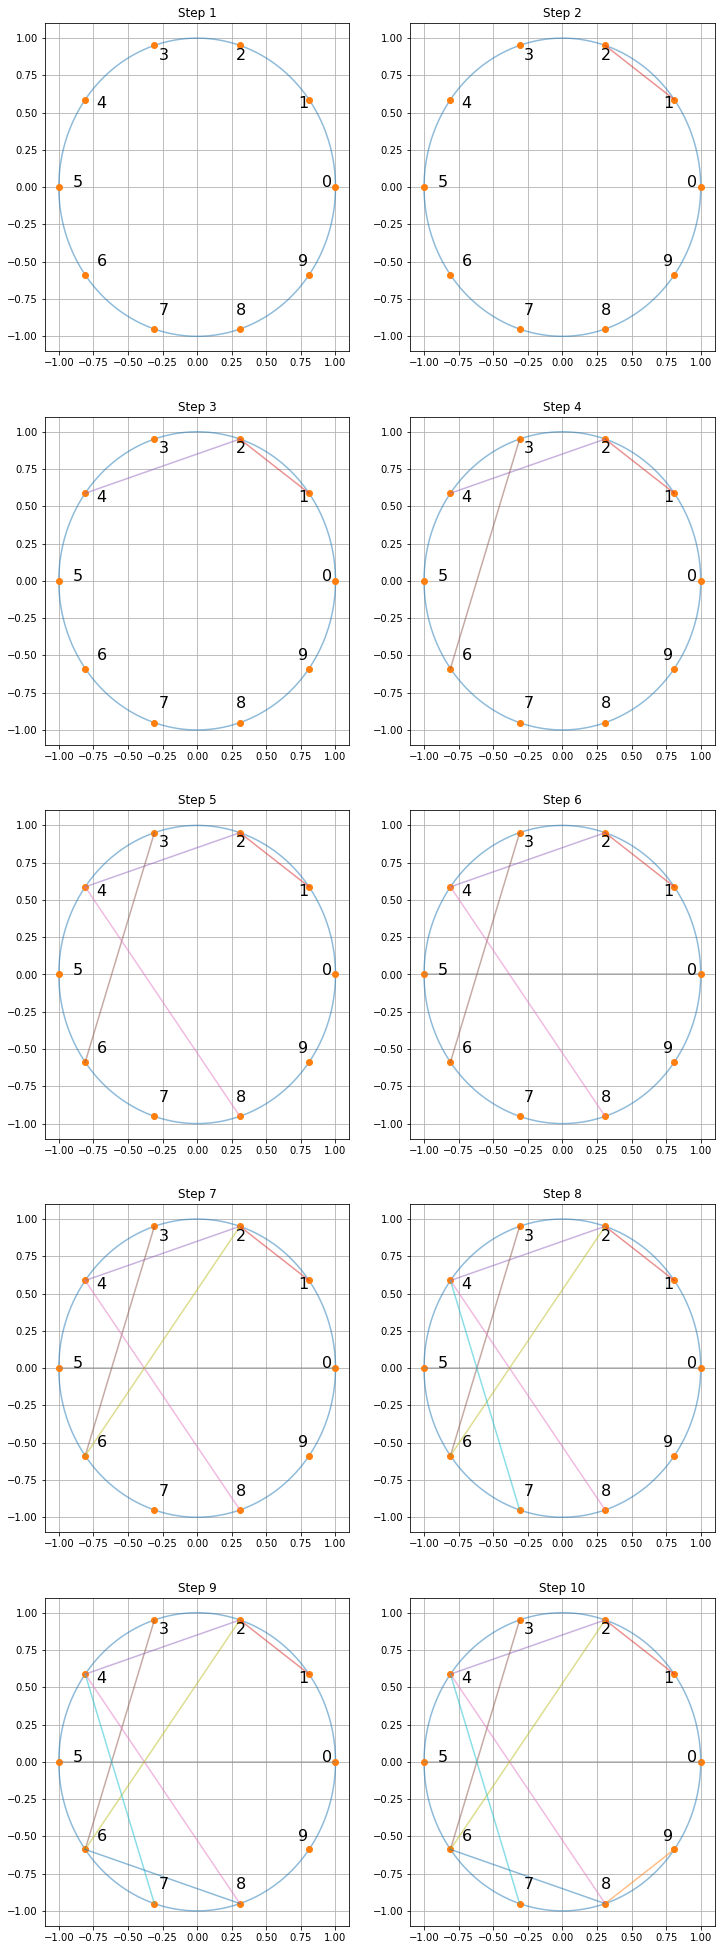

In [11]:
n_mod = 10
n_base=2
r_circle = 1.
#
fg = plt.figure(figsize=(12,35))
n_cols=2
n_rws = int(numpy.ceil(n_mod//n_cols))
#
#print('*** ', n_mod, n_cols, n_rws)
#
for n in range(1,n_mod+1):
    ax = fg.add_subplot( n_rws, n_cols, n )
    ax.grid()
    ax.set_title(f'Step {n}')
    TT = Times_Table_Graph(n_mod=n_mod, base=n_base, r_circle=r_circle, n_steps=n, ax=ax, label_steps=1)
#

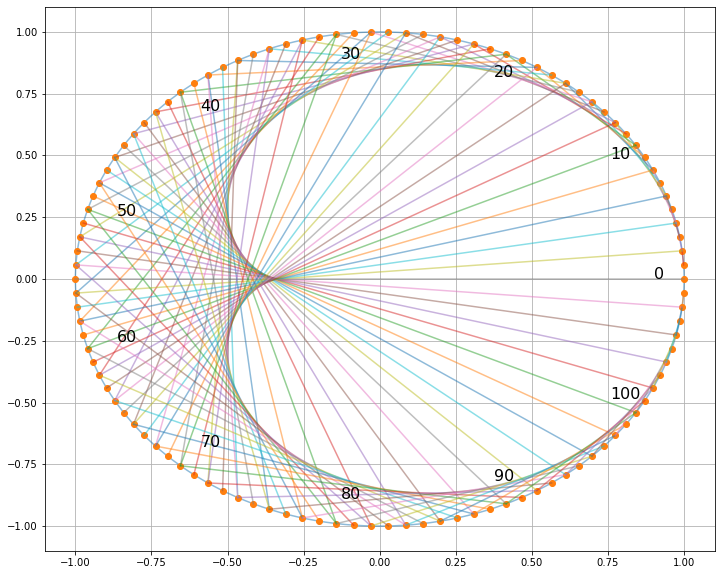

In [12]:
TT_11 = Times_Table_Graph(n_mod=110, base=2,n_steps=None, label_steps=10)

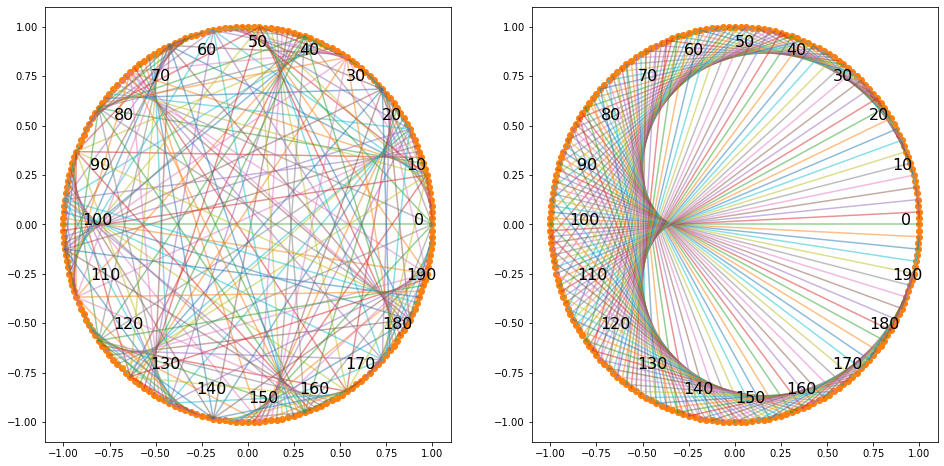

In [18]:
fg = plt.figure(figsize=(16,8))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
#
TT_11 = Times_Table_Graph(n_mod=200, base=8,n_steps=None, label_steps=10, ax=ax1)
TT_11 = Times_Table_Graph(n_mod=200, base=2,n_steps=None, label_steps=10, ax=ax2)

In [7]:
numpy.mod([10,11,12],3)

array([1, 2, 0])